# Linear Regression 
Why do we square the errors? 

The error can be positive or negative, we square it because we don't want negative errors to be added so it won't trigger a fake fit straight line.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [21]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
print(data.shape)
data.head()

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Simple linear regression

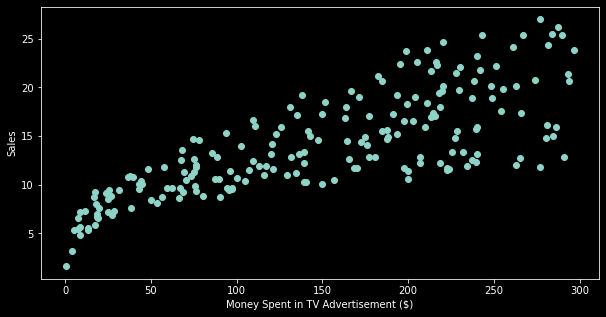

In [22]:
plt.figure(figsize=(10,5))
plt.xlabel('Money Spent in TV Advertisement ($)')
plt.ylabel('Sales')
plt.scatter(data['TV'], data['sales'])

In [23]:
X = data['TV'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X, y)

def forecast_sale_given_money_spent_on_tv(*args):
    return reg.predict(np.array(args).reshape(-1,1))

print(f"The linear model is:\n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV")
test = 17.2
print(f'\nGiven X = {test}')
print(f'Prediction: {forecast_sale_given_money_spent_on_tv(test)}')

The linear model is:
 Y = 7.032593549127694 + 0.04753664043301976*TV

Given X = 17.2
Prediction: [[7.85022376]]


Text(0, 0.5, 'Sales')

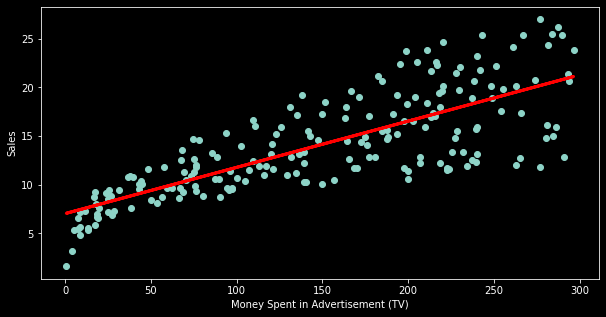

In [24]:
predictions = reg.predict(X)

plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(X, predictions, color='red', linewidth=3)
plt.xlabel('Money Spent in Advertisement (TV)')
plt.ylabel('Sales')

In [25]:
# Quality Assessment of the model
X = data['TV']
y = data['sales']

exog = sm.add_constant(X)

# ordinary least squares
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           1.47e-42
Time:                        06:56:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Multiple Linear Regression

In [39]:
Xs = data.drop('sales', axis=1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

tv_coef = reg.coef_[0][0]
radio_coef = reg.coef_[0][1]
newspaper_coef = reg.coef_[0][2]

print(f'The linear model is: \n Y = {reg.intercept_[0]} + {tv_coef}*TV + {radio_coef}*radio + {newspaper_coef}*newspaper')

The linear model is: 
 Y = 2.9388893694594067 + 0.04576464545539761*TV + 0.18853001691820453*radio + -0.00103749304247629*newspaper


In [45]:
# Testing the model
exog = sm.add_constant(Xs)
est = sm.OLS(y, exog).fit()

print(est.summary())
# newspaper is not significant because it has a p-value greater than 0.5

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           1.58e-96
Time:                        07:19:46   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
